In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens/')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=2,processes=False,memory_limit='25gb',threads_per_worker=4,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38895 instead
  warnings.warn(


In [3]:
len(client.scheduler_info()['workers'])

2

In [4]:
from skylens import *
from survey_utils import *

pid:  46311 3.8.2 (default, Mar 26 2020, 15:53:00) 
[GCC 7.3.0]


In [5]:
#only for python3
import importlib
reload=importlib.reload

In [6]:
zs=lsst_source_tomo_bins()
corr_ll=('shear', 'shear')

ns0:  27.0


In [7]:
wigner_files={}
# wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
# wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'
wig_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/'
wigner_files[0]= wig_home+'dask_wig3j_l3500_w2100_0_reorder.zarr'
wigner_files[2]= wig_home+'/dask_wig3j_l3500_w2100_2_reorder.zarr'


# Power Spectrum covariance

In [8]:
#setup parameters
lmax_cl=200
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=20
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=False
tidal_SSV_cov=False
Tri_cov=False

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

In [9]:
window_lmax=20

In [10]:
use_window=True
do_cov=True

In [11]:
nside=128

In [39]:
unit_window=False

In [40]:
??source_tomo_bins

In [41]:
f_sky=0.3

In [42]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside,unit_win=unit_window,f_sky=f_sky,use_shot_noise=False)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:69: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:396: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/survey_utils.py:119: RuntimeWarning: invalid value encountered in sqrt


In [43]:
store_win=True

In [44]:
do_pseudo_cl=True
do_xi=False

In [45]:
import skylens
reload(skylens)
from skylens import *

In [46]:
#use all ell

#no window, c_ell
use_binned_l=False
kappa00=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=False,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=False
                                       )

In [47]:
#use all ell
use_binned_l=False

#with windows, full binnning
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=False
                                       )

In [48]:
use_binned_l=True

#with window, iMaster.
kappa_b=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                use_window=use_window,Tri_cov=Tri_cov,
                use_binned_l=use_binned_l,wigner_files=wigner_files,
                SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                store_win=store_win,window_lmax=window_lmax,
                sparse_cov=False
            )

In [49]:
dl=l_bins[1:]-l_bins[:-1]

In [50]:
kappa0.l_bins

array([ 12,  13,  16,  18,  21,  24,  28,  33,  38,  44,  51,  59,  68,
        79,  91, 106, 122, 142, 164, 189])

In [51]:
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [52]:
%time cl00G=kappa00.cl_tomo() 
%time cl0G=kappa0.cl_tomo() 
%time clbG=kappa_b.cl_tomo() 

In [53]:
cl00=client.compute(cl00G['stack']).result()
cl0=client.compute(cl0G['stack']).result()
clb=client.compute(clbG['stack']).result()

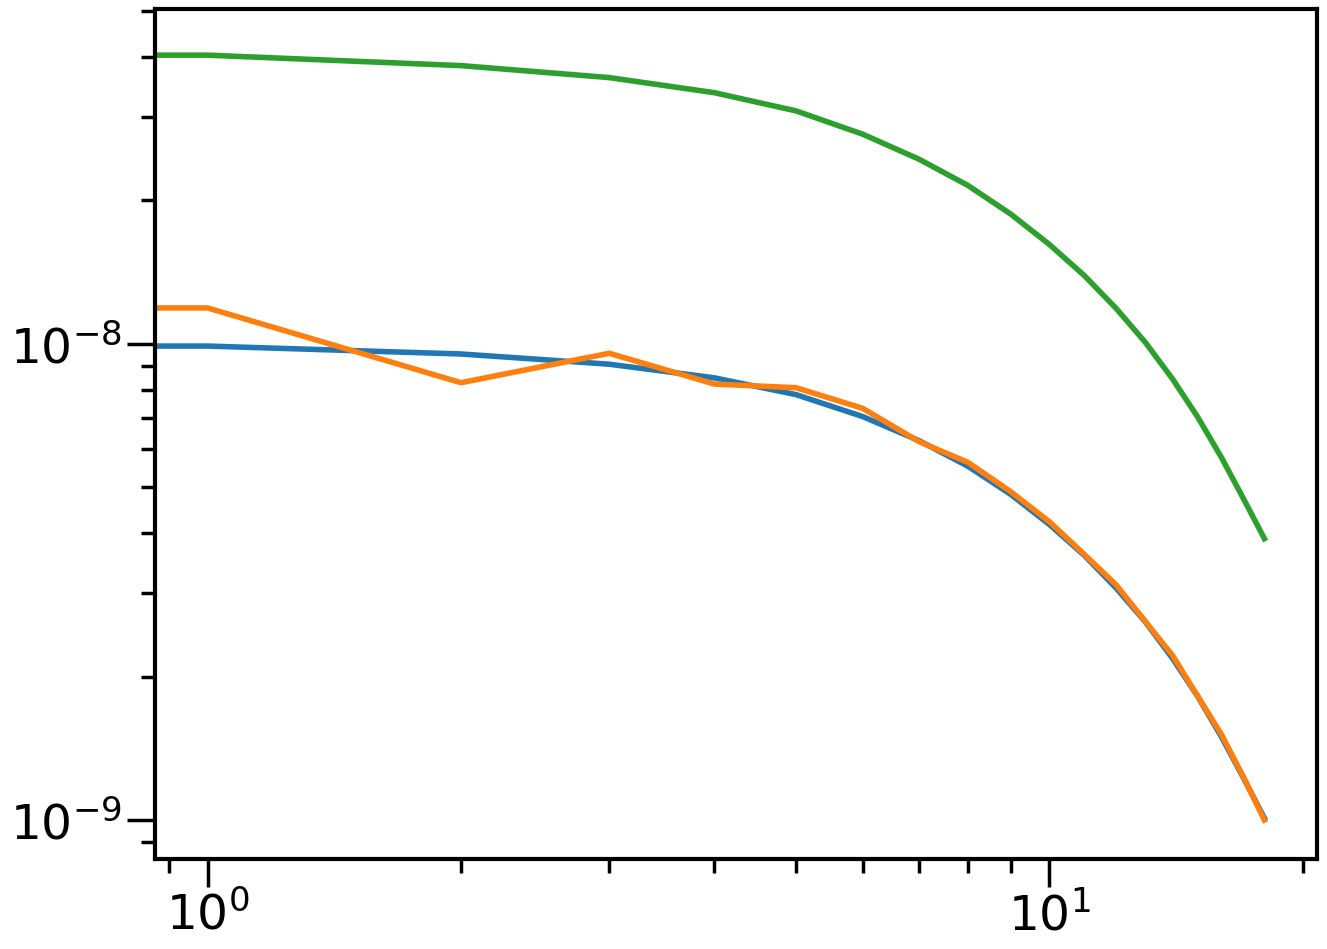

In [54]:
plot(cl0['pcl_b'])
plot(clb['pcl_b'])
plot(cl00['pcl_b'])
loglog()
show()

In [55]:
clb['pcl_b']/cl0['pcl_b']

array([0.45605393, 1.20248857, 0.87044048, 1.05426583, 0.97035535,
       1.03391286, 1.04059947, 0.99539203, 1.01909455, 1.01329404,
       1.01339896, 1.00463442, 1.01560418, 1.00267219, 1.01424703,
       1.00145374, 1.01146621, 1.00471276, 0.99024979])

In [56]:
cl00['pcl_b']/clb['pcl_b'] #~4pi fsky.

array([9.07461466, 3.39463942, 4.63235897, 3.79211639, 4.09112831,
       3.8131595 , 3.76455837, 3.91748848, 3.81435448, 3.82748902,
       3.82115942, 3.85051371, 3.80616324, 3.85323773, 3.80772448,
       3.85515268, 3.81612068, 3.84122455, 3.89902596])

In [57]:
np.diag(clb['cov']/cl0['cov'])

<ipython-input-57-156bccaf4f69>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(clb['cov']/cl0['cov'])


array([0.5       , 1.20292239, 0.7918636 , 1.20187568, 0.85818084,
       0.98894147, 1.11277438, 0.90998907, 0.98978543, 1.00064851,
       0.99120837, 1.00029398, 1.0002092 , 0.9535723 , 1.03436807,
       0.93548968, 1.01950737, 0.9944892 , 1.08580916])

In [58]:
def corr_matrix(cov=[]):
    err=np.sqrt(np.diag(cov))
    corr=cov/np.outer(err,err)
    return corr

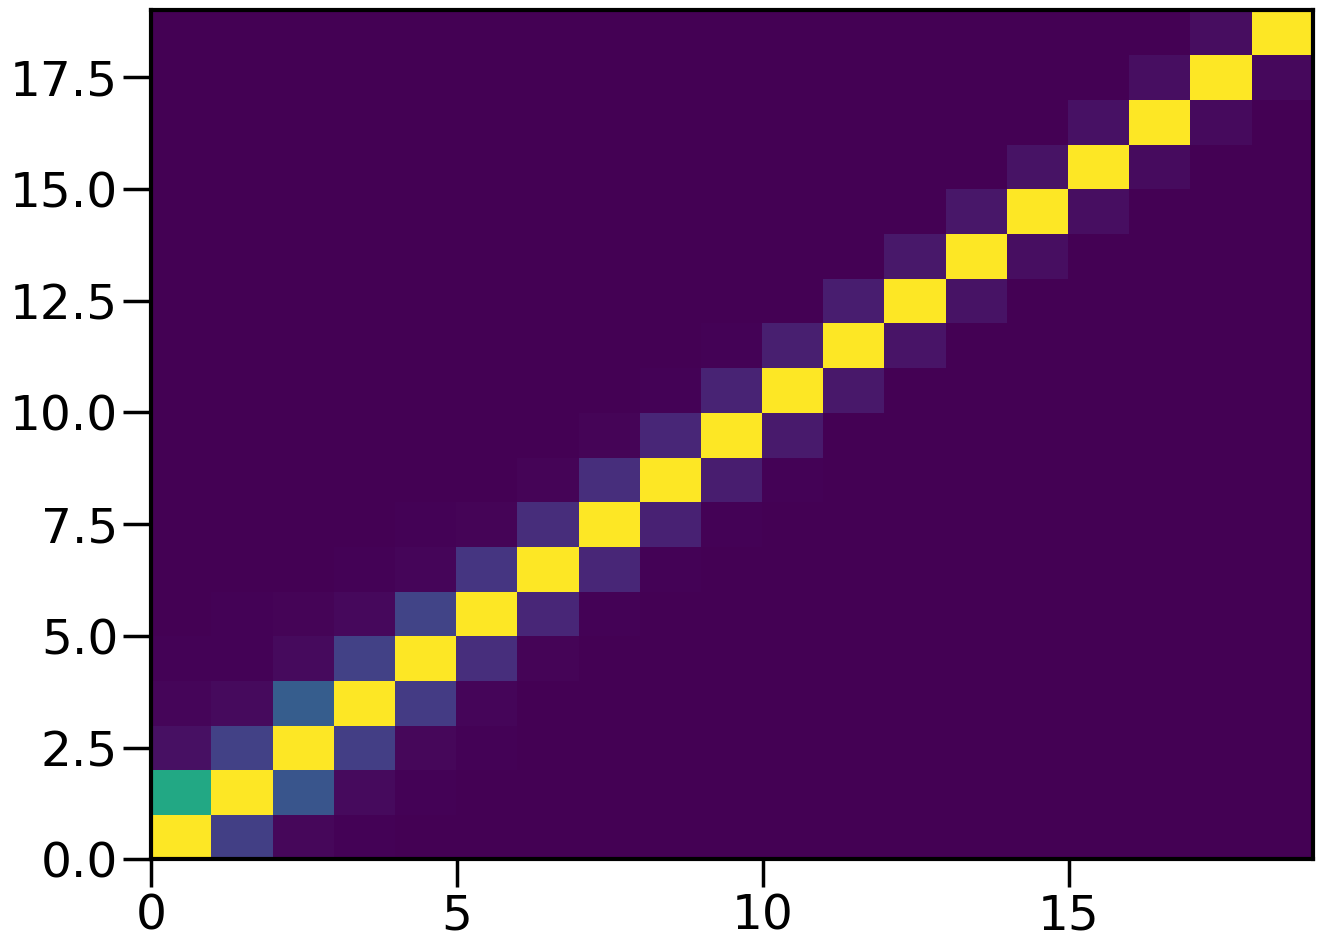

In [59]:
pcolor(corr_matrix(clb['cov']))
plt.show()

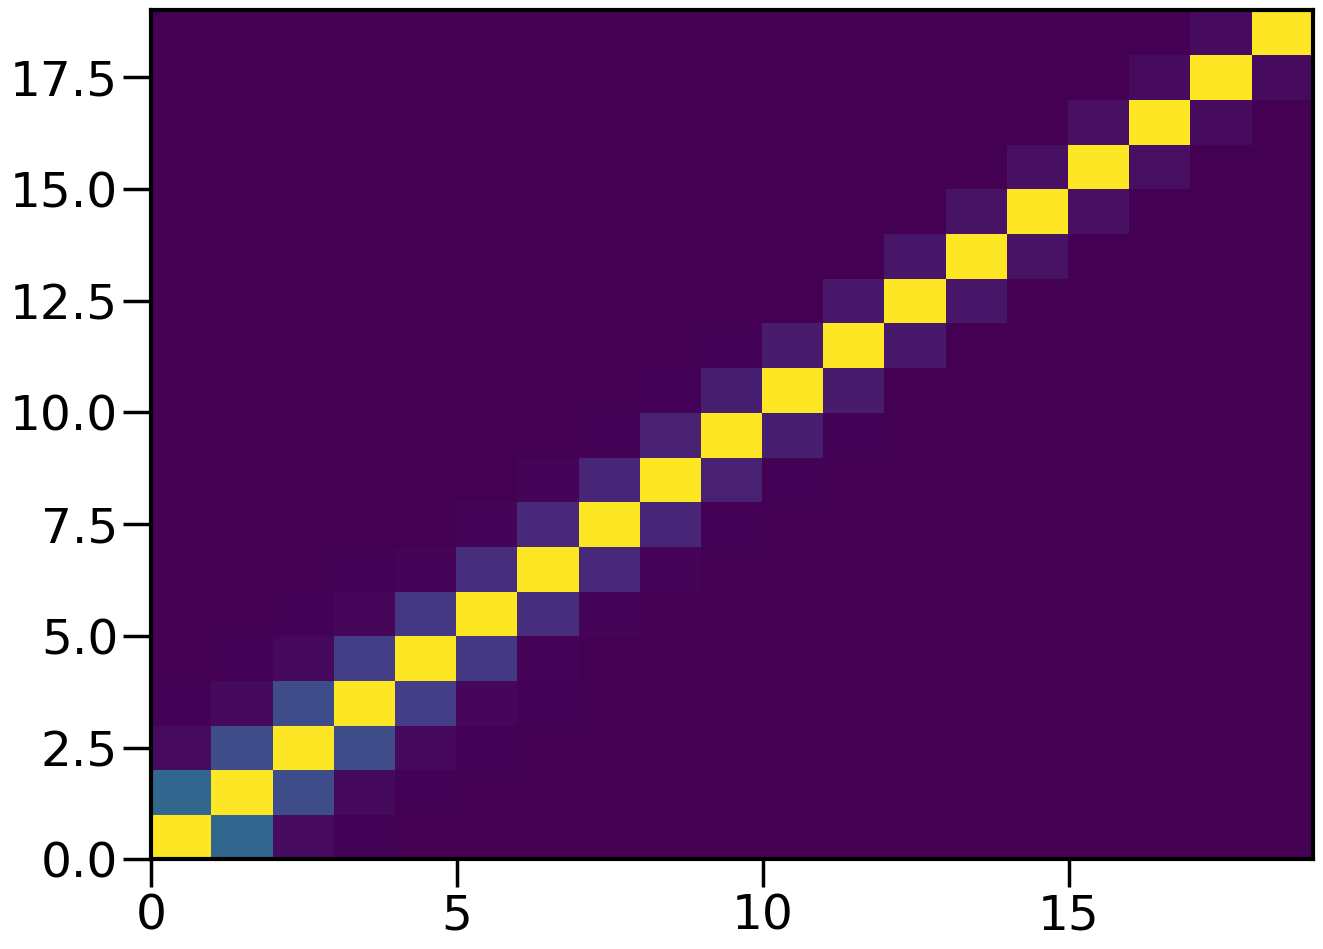

In [60]:
pcolor(corr_matrix(cl0['cov']))

In [61]:
np.diag(cl00['cov']/cl0['cov'])

<ipython-input-61-57a6f7b9c0bb>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(cl00['cov']/cl0['cov'])


array([40.29114157, 20.28959218, 24.0405953 , 20.07993733, 20.00662392,
       18.39771025, 17.39740417, 17.35707725, 16.70847605, 16.25564807,
       15.90714906, 15.63865139, 15.25631904, 15.10747227, 14.79183986,
       14.70819542, 14.47118516, 14.38274051, 14.27923692])

In [62]:
2*cl00['pcl_b']**2/np.diag(cl00['cov'])/(2*lb+1)/dl

array([0.28868369, 0.29146009, 0.29188969, 0.29324904, 0.29400718,
       0.29497867, 0.29579571, 0.2962369 , 0.29675279, 0.29718444,
       0.29754692, 0.29785012, 0.29813512, 0.298329  , 0.29848707,
       0.29860493, 0.29869221, 0.29884712, 0.29900055])

In [63]:
bi=(0,0)

In [64]:
m2=kappa0.binning.bin_2d_coupling(cov=kappa0.Win.Win['cl'][corr_ll][bi]['M'],
                                   wt0=kappa_b.Win.Win['cl'][corr_ll][bi]['bin_wt']['wt0'],
                                   wt_b=kappa_b.Win.Win['cl'][corr_ll][bi]['bin_wt']['wt_b'],
                                  bin_utils=kappa0.cl_bin_utils)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
np.diag(m2)

In [ ]:
np.diag(m2),np.diag(kappa_b.Win.Win['cl'][corr_ll][bi]['M'])

In [ ]:
m2/kappa_b.Win.Win['cl'][corr_ll][bi]['M']

In [ ]:
np.all(np.isclose(m2,kappa_b.Win.Win['cl'][corr_ll][bi]['M']))

In [ ]:
x=np.arange(10)

In [ ]:
plot(x,x)